In [2]:
import os
import cv2
import numpy as np
import random
from tabulate import tabulate
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Fungsi untuk menambahkan Gaussian noise
def add_gaussian_noise(image, mean=0, var=0.02):
    image = image.astype(np.float32) / 255.0
    sigma = var ** 0.5
    gauss = np.random.normal(mean, sigma, image.shape)
    noisy = image + gauss * 255
    return np.clip(noisy, 0, 255).astype(np.uint8)

# Fungsi untuk memproses folder rotten
def process_rotten():
    rotten_path = '/content/drive/My Drive/PCD_Proyek/Model/test/rotten'
    rotten_output = '/content/drive/My Drive/PCD_Proyek/Model/test/rotten_gaussian'
    os.makedirs(rotten_output, exist_ok=True)

    for filename in os.listdir(rotten_path):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(rotten_path, filename)
            img = cv2.imread(img_path)

            if img is None:
                print(f"Gagal membaca gambar: {img_path}")
                continue

            noisy_img = add_gaussian_noise(img)
            output_path = os.path.join(rotten_output, filename)
            cv2.imwrite(output_path, noisy_img)

    print("Selesai menambahkan noise pada folder rotten.")

# Fungsi untuk memproses folder unrotten
def process_unrotten():
    unrotten_path = '/content/drive/My Drive/PCD_Proyek/Model/test/unrotten'
    unrotten_output = '/content/drive/My Drive/PCD_Proyek/Model/test/unrotten_gaussian'
    os.makedirs(unrotten_output, exist_ok=True)

    for filename in os.listdir(unrotten_path):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(unrotten_path, filename)
            img = cv2.imread(img_path)

            if img is None:
                print(f"Gagal membaca gambar: {img_path}")
                continue

            noisy_img = add_gaussian_noise(img)
            output_path = os.path.join(unrotten_output, filename)
            cv2.imwrite(output_path, noisy_img)

    print("Selesai menambahkan noise pada folder unrotten.")

# Jalankan kedua fungsi
process_rotten()
process_unrotten()


Selesai menambahkan noise pada folder rotten.
Selesai menambahkan noise pada folder unrotten.


Menampilkan contoh citra asli dan citra yang sudah diberi noise

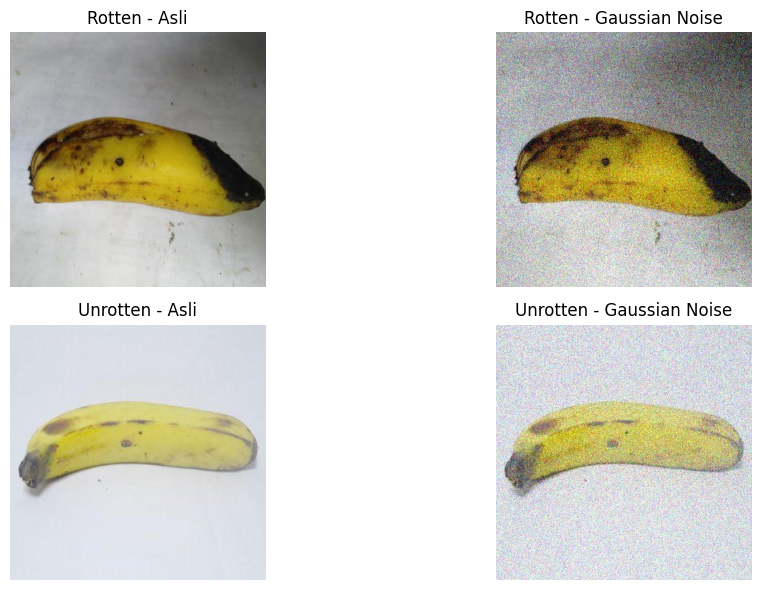

In [4]:
import cv2
import matplotlib.pyplot as plt
import os

# Path folder asli dan folder hasil noise
rotten_original_path = '/content/drive/My Drive/PCD_Proyek/Model/test/rotten'
rotten_noisy_path = '/content/drive/My Drive/PCD_Proyek/Model/test/rotten_gaussian'

unrotten_original_path = '/content/drive/My Drive/PCD_Proyek/Model/test/unrotten'
unrotten_noisy_path = '/content/drive/My Drive/PCD_Proyek/Model/test/unrotten_gaussian'

# Ambil nama file contoh
rotten_filename = os.listdir(rotten_original_path)[0]
unrotten_filename = os.listdir(unrotten_original_path)[0]

# Baca gambar rotten
rotten_original = cv2.imread(os.path.join(rotten_original_path, rotten_filename))
rotten_noisy = cv2.imread(os.path.join(rotten_noisy_path, rotten_filename))

# Baca gambar unrotten
unrotten_original = cv2.imread(os.path.join(unrotten_original_path, unrotten_filename))
unrotten_noisy = cv2.imread(os.path.join(unrotten_noisy_path, unrotten_filename))

# Ubah BGR ke RGB untuk ditampilkan dengan matplotlib
rotten_original = cv2.cvtColor(rotten_original, cv2.COLOR_BGR2RGB)
rotten_noisy = cv2.cvtColor(rotten_noisy, cv2.COLOR_BGR2RGB)
unrotten_original = cv2.cvtColor(unrotten_original, cv2.COLOR_BGR2RGB)
unrotten_noisy = cv2.cvtColor(unrotten_noisy, cv2.COLOR_BGR2RGB)

# Tampilkan hasil
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(rotten_original)
plt.title('Rotten - Asli')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(rotten_noisy)
plt.title('Rotten - Gaussian Noise')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(unrotten_original)
plt.title('Unrotten - Asli')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(unrotten_noisy)
plt.title('Unrotten - Gaussian Noise')
plt.axis('off')

plt.tight_layout()
plt.show()


Melihat perbandingan visualisasi filter gaussian, mean, median (kernel 5x5) terhadap gaussian noise (rotten)

In [ ]:
def show_images_side_by_side(images, titles=None):
    height = min(img.shape[0] for img in images)
    resized_images = [cv2.resize(img, (int(img.shape[1] * height / img.shape[0]), height)) for img in images]
    combined = np.hstack(resized_images)
    cv2_imshow(combined)
    if titles:
        print(" | ".join(titles))

# Path folder gambar
noisy_folder = '/content/drive/My Drive/PCD_Proyek/Model/test/rotten_gaussian'
original_folder = '/content/drive/My Drive/PCD_Proyek/Model/test/rotten'

# Ambil 10 file
n = 10
all_files = [f for f in os.listdir(noisy_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
files = random.sample(all_files, min(n, len(all_files)))

# Simpan hasil evaluasi ke dalam dictionary untuk digunakan nanti
mse_table = {}
psnr_table = {}

# Visualisasi dan hitung sementara
for filename in files:
    orig_path = os.path.join(original_folder, filename)
    noisy_path = os.path.join(noisy_folder, filename)

    orig = cv2.imread(orig_path)
    noisy = cv2.imread(noisy_path)

    if noisy is None or orig is None:
        print(f"Gagal membaca {filename}")
        continue

    # Terapkan filter
    mean_restored = cv2.blur(noisy, (5, 5))
    median_restored = cv2.medianBlur(noisy, 5)
    gaussian_restored = cv2.GaussianBlur(noisy, (5, 5), 1.0)

    # Visualisasi
    print(f"\n{filename}:")
    show_images_side_by_side(
        [orig, noisy, gaussian_restored, mean_restored, median_restored],
        titles=['Original', 'Noisy', 'Gaussian', 'Mean', 'Median']
    )

    # Simpan sementara ke dictionary
    mse_table[filename] = {
        'Gaussian Noise': np.mean((orig.astype("float") - noisy.astype("float")) ** 2),
        'Gaussian Filter': np.mean((orig.astype("float") - gaussian_restored.astype("float")) ** 2),
        'Mean Filter': np.mean((orig.astype("float") - mean_restored.astype("float")) ** 2),
        'Median Filter': np.mean((orig.astype("float") - median_restored.astype("float")) ** 2),
    }

    def calculate_psnr(mse):
        if mse == 0:
            return float('inf')
        PIXEL_MAX = 255.0
        return 20 * np.log10(PIXEL_MAX / np.sqrt(mse))

    psnr_table[filename] = {
        k: calculate_psnr(v) for k, v in mse_table[filename].items()
    }


Output hidden; open in https://colab.research.google.com to view.

Pemilihan filter dan kernel yang optimal berdasarkan nilai MSE dan PSNR

Perbandingan visualisasi dengan kernel 3x3 dan 5x5

In [ ]:
def show_images_side_by_side(images, titles=None):
    height = min(img.shape[0] for img in images)
    resized_images = [cv2.resize(img, (int(img.shape[1] * height / img.shape[0]), height)) for img in images]
    combined = np.hstack(resized_images)
    cv2_imshow(combined)
    if titles:
        print(" | ".join(titles))

# Path folder gambar
noisy_folder = '/content/drive/My Drive/PCD_Proyek/Model/test/rotten_gaussian'
original_folder = '/content/drive/My Drive/PCD_Proyek/Model/test/rotten'

# Ambil 1 file acak
all_files = [f for f in os.listdir(noisy_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
filename = random.choice(all_files)

# Ukuran kernel yang ingin diuji
kernel_sizes = [3, 5]

# Visualisasi
orig_path = os.path.join(original_folder, filename)
noisy_path = os.path.join(noisy_folder, filename)

orig = cv2.imread(orig_path)
noisy = cv2.imread(noisy_path)

if noisy is not None and orig is not None:
    print(f"\nVisualisasi gambar: {filename}")
    show_images_side_by_side([orig, noisy], titles=['Original', 'Noisy'])

    for k in kernel_sizes:
        mean_restored = cv2.blur(noisy, (k, k))
        median_restored = cv2.medianBlur(noisy, k)
        gaussian_restored = cv2.GaussianBlur(noisy, (k, k), 0)

        show_images_side_by_side(
            [gaussian_restored, mean_restored, median_restored],
            titles=[f'Gaussian {k}x{k}', f'Mean {k}x{k}', f'Median {k}x{k}']
        )
else:
    print("Gagal membaca gambar.")


Output hidden; open in https://colab.research.google.com to view.

Perhitungan rata-rata MSE dan PSNR dari masing" 5 citra rotten dan unrotten

In [ ]:
# Path asli dan noisy
base_original_rotten = '/content/drive/MyDrive/PCD_Proyek/Model/test/rotten'
base_original_unrotten = '/content/drive/MyDrive/PCD_Proyek/Model/test/unrotten'
base_noisy_rotten = '/content/drive/MyDrive/PCD_Proyek/Model/test/rotten_gaussian'
base_noisy_unrotten = '/content/drive/MyDrive/PCD_Proyek/Model/test/unrotten_gaussian'

# Ambil 5 file acak dari masing-masing folder
def get_random_files(folder, n=5):
    files = [f for f in os.listdir(folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    return random.sample(files, min(n, len(files)))

# Konfigurasi kernel
kernel_sizes = [3, 5]
mse_table = {}
psnr_table = {}

# Fungsi evaluasi satu kategori
def evaluate_images(label, original_folder, noisy_folder, files):
    for filename in files:
        orig_path = os.path.join(original_folder, filename)
        noisy_path = os.path.join(noisy_folder, filename)

        orig = cv2.imread(orig_path)
        noisy = cv2.imread(noisy_path)

        if orig is None or noisy is None:
            print(f"Gagal membaca gambar {filename}")
            continue

        full_name = f"{label}/{filename}"
        mse_table[full_name] = {}
        psnr_table[full_name] = {}

        for k in kernel_sizes:
            mean_filtered = cv2.blur(noisy, (k, k))
            median_filtered = cv2.medianBlur(noisy, k)
            gaussian_filtered = cv2.GaussianBlur(noisy, (k, k), 0)

            mse_table[full_name][f'Gaussian {k}x{k}'] = mse(orig, gaussian_filtered)
            mse_table[full_name][f'Mean {k}x{k}']     = mse(orig, mean_filtered)
            mse_table[full_name][f'Median {k}x{k}']   = mse(orig, median_filtered)

            psnr_table[full_name][f'Gaussian {k}x{k}'] = psnr(orig, gaussian_filtered, data_range=255)
            psnr_table[full_name][f'Mean {k}x{k}']     = psnr(orig, mean_filtered, data_range=255)
            psnr_table[full_name][f'Median {k}x{k}']   = psnr(orig, median_filtered, data_range=255)

# Evaluasi rotten dan unrotten
evaluate_images('rotten', base_original_rotten, base_noisy_rotten, get_random_files(base_noisy_rotten))
evaluate_images('unrotten', base_original_unrotten, base_noisy_unrotten, get_random_files(base_noisy_unrotten))

# Ambil jenis filter dari salah satu entri
sample_filters = list(mse_table.values())[0].keys()
headers = ["Nama Citra"] + list(sample_filters)

# === TABEL MSE ===
print("\n=== Tabel MSE ===")
mse_rows = []
for filename, values in mse_table.items():
    row = [filename] + [f"{values[filter_name]:.2f}" for filter_name in sample_filters]
    mse_rows.append(row)

mse_avg = ["Rata-rata"]
for filter_name in sample_filters:
    avg = np.mean([v[filter_name] for v in mse_table.values()])
    mse_avg.append(f"{avg:.2f}")
mse_rows.append(mse_avg)

print(tabulate(mse_rows, headers=headers, tablefmt="grid"))

# === TABEL PSNR ===
print("\n=== Tabel PSNR ===")
psnr_rows = []
for filename, values in psnr_table.items():
    row = [filename] + [f"{values[filter_name]:.2f} dB" for filter_name in sample_filters]
    psnr_rows.append(row)

psnr_avg = ["Rata-rata"]
for filter_name in sample_filters:
    avg = np.mean([v[filter_name] for v in psnr_table.values()])
    psnr_avg.append(f"{avg:.2f} dB")
psnr_rows.append(psnr_avg)

print(tabulate(psnr_rows, headers=headers, tablefmt="grid"))



=== Tabel MSE ===
+--------------------------+----------------+------------+--------------+----------------+------------+--------------+
| Nama Citra               |   Gaussian 3x3 |   Mean 3x3 |   Median 3x3 |   Gaussian 5x5 |   Mean 5x5 |   Median 5x5 |
+==========================+================+============+==============+================+============+==============+
| rotten/rotten27.jpg      |         115.68 |     100.8  |       125.66 |          81.07 |      63.25 |        66.52 |
+--------------------------+----------------+------------+--------------+----------------+------------+--------------+
| rotten/rotten11.jpg      |         121.66 |     101.95 |       137.22 |          76.81 |      51.58 |        63.01 |
+--------------------------+----------------+------------+--------------+----------------+------------+--------------+
| rotten/rotten395.jpg     |         177.56 |     165.06 |       160.75 |         148.49 |     141.55 |       108.35 |
+--------------------------+-

Filter Mean 5x5 menunjukkan performa terbaik. Hal ini ditunjukkan oleh nilai rata-rata MSE terendah (109.41) yang mengindikasikan kesalahan piksel terkecil, serta nilai rata-rata PSNR tertinggi (28.51 dB) yang menandakan kualitas citra hasil filtering paling mendekati citra aslinya.









In [ ]:
import os
import cv2
from google.colab import drive

# Mount Google Drive (kalau belum)
drive.mount('/content/drive')

# Path input dan output
input_paths = {
    'rotten': '/content/drive/My Drive/PCD_Proyek/Model/test/rotten_gaussian',
    'unrotten': '/content/drive/My Drive/PCD_Proyek/Model/test/unrotten_gaussian'
}

output_paths = {
    'rotten': '/content/drive/My Drive/PCD_Proyek/Model/test/rotten_gaussian_mean5x5',
    'unrotten': '/content/drive/My Drive/PCD_Proyek/Model/test/unrotten_gaussian_mean5x5'
}

# Pastikan folder output ada
for path in output_paths.values():
    os.makedirs(path, exist_ok=True)

# Proses filter Mean 5x5
for category in ['rotten', 'unrotten']:
    input_folder = input_paths[category]
    output_folder = output_paths[category]

    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            input_path = os.path.join(input_folder, filename)
            output_path = os.path.join(output_folder, filename)

            image = cv2.imread(input_path)
            if image is None:
                print(f"Gagal membaca: {input_path}")
                continue

            filtered = cv2.blur(image, (5, 5))  # Mean filter 5x5
            cv2.imwrite(output_path, filtered)

print("Selesai menyimpan hasil filtering Mean 5x5.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Selesai menyimpan hasil filtering Mean 5x5.


In [5]:
import cv2
import os
import numpy as np
from google.colab.patches import cv2_imshow

# Fungsi untuk menampilkan beberapa gambar berdampingan
def show_images_side_by_side(images, titles=None):
    height = min(img.shape[0] for img in images)
    resized_images = [cv2.resize(img, (int(img.shape[1] * height / img.shape[0]), height)) for img in images]
    combined = np.hstack(resized_images)
    cv2_imshow(combined)
    if titles:
        print(" | ".join(titles))

# Daftar nama file citra
image_filenames = [
    "rotten27.jpg", "rotten11.jpg", "rotten395.jpg", "rotten260.jpg", "rotten199.jpg",
    "unrotten411.jpg", "unrotten380.jpg", "unrotten182.jpg", "unrotten26.jpg", "unrotten33.jpg"
]

# Folder path
base_dir = "/content/drive/My Drive/PCD_Proyek/Model/test"
folders = {
    "rotten": os.path.join(base_dir, "rotten"),
    "rotten_gaussian": os.path.join(base_dir, "rotten_gaussian"),
    "unrotten": os.path.join(base_dir, "unrotten"),
    "unrotten_gaussian": os.path.join(base_dir, "unrotten_gaussian"),
}

# Ukuran kernel yang ingin diuji
kernel_sizes = [3, 5]

# Proses visualisasi setiap gambar
for filename in image_filenames:
    category = "rotten" if filename.startswith("rotten") else "unrotten"

    orig_path = os.path.join(folders[category], filename)
    noisy_path = os.path.join(folders[f"{category}_gaussian"], filename)

    orig = cv2.imread(orig_path)
    noisy = cv2.imread(noisy_path)

    if orig is None or noisy is None:
        print(f"Gagal membaca gambar: {filename}")
        continue

    print(f"\nVisualisasi gambar: {filename}")
    show_images_side_by_side([orig, noisy], titles=['Original', 'Noisy'])

    for k in kernel_sizes:
        mean_restored = cv2.blur(noisy, (k, k))
        median_restored = cv2.medianBlur(noisy, k)
        gaussian_restored = cv2.GaussianBlur(noisy, (k, k), 0)

        show_images_side_by_side(
            [gaussian_restored, mean_restored, median_restored],
            titles=[f'Gaussian {k}x{k}', f'Mean {k}x{k}', f'Median {k}x{k}']
        )


Output hidden; open in https://colab.research.google.com to view.